In [33]:
import numpy as np
from sklearn import datasets, neighbors

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [35]:
%matplotlib inline

In [36]:
data = np.genfromtxt("demo_data/6.overlap.csv", delimiter = ",")
print(data[:3, :])

[[7.  3.2 0. ]
 [6.4 3.2 0. ]
 [6.9 3.1 0. ]]


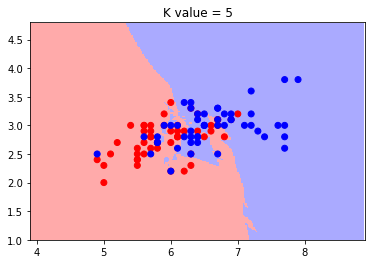

In [37]:
def knn_comparision(data, n_neighbors):
    
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    x = data[:, :2]
    y = data[:, 2]

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(x, y)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    x__y = np.c_[xx.ravel(), yy.ravel()]

    Z = clf.predict(x__y)
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap = cmap_bold)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title("K value = "+str(n_neighbors))
    
    plt.show()
    
    return
knn_comparision(data, 5)